In [78]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [79]:
conn = sqlite3.connect("../db.sqlite3")

read_data = pd.read_sql(
    sql=(
        """
        select restaurant_orderitem.order_id, restaurant_order.datetime, restaurant_orderitem.id as orderitem_id, restaurant_orderitem.quantity, restaurant_orderitem.product_id, restaurant_product.price, restaurant_product.name 
        from restaurant_order
        full join restaurant_orderitem
        on restaurant_order.id = restaurant_orderitem.order_id
        full join restaurant_product
        on restaurant_product.id = restaurant_orderitem.product_id
        """
    ),
    con=conn
)

conn.close()

read_data.to_csv("restaurant_combined_data.csv", index=False)

df = pd.read_csv("restaurant_combined_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      74818 non-null  int64  
 1   datetime      74818 non-null  object 
 2   orderitem_id  74818 non-null  int64  
 3   quantity      74818 non-null  int64  
 4   product_id    74818 non-null  int64  
 5   price         74818 non-null  float64
 6   name          74818 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.0+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

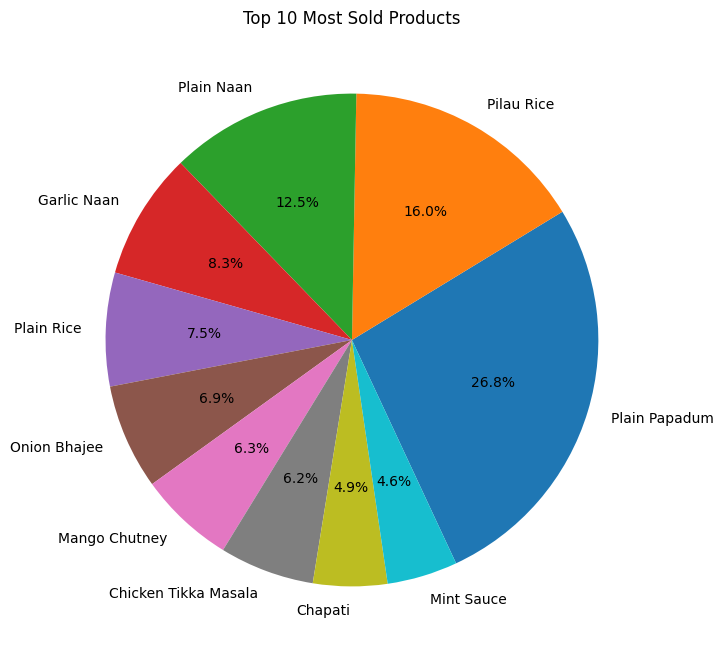

In [84]:
product_quantity = df.groupby("name")["quantity"].sum().reset_index()

most_sold_products = product_quantity.sort_values(by="quantity", ascending=False).head(10)

plt.figure(figsize=(12, 8))

plt.pie(most_sold_products["quantity"], labels=most_sold_products["name"], startangle=-65, autopct="%1.1f%%")
plt.title("Top 10 Most Sold Products")

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

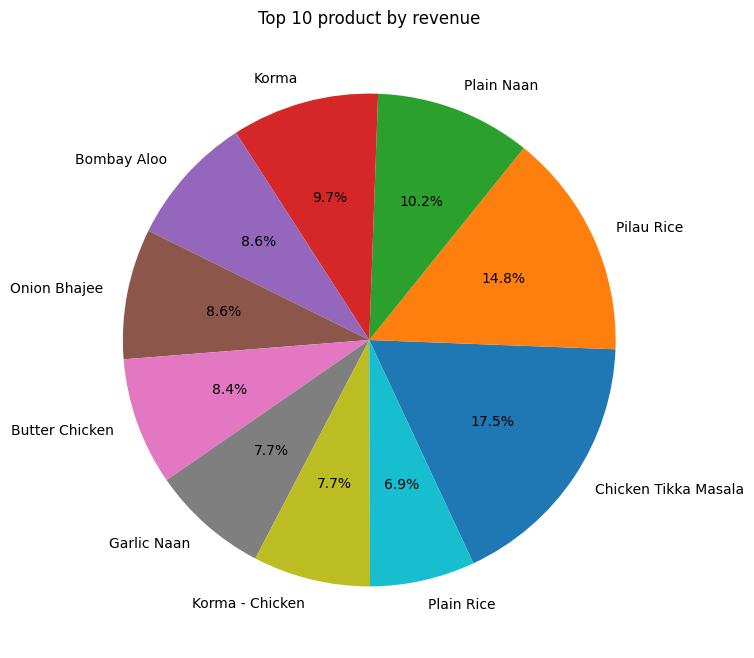

In [85]:
df["item-price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("name")["item-price"].sum().reset_index()

top_ten_products = product_revenue.sort_values(by="item-price", ascending=False).head(10)

plt.figure(figsize=(12, 8))

plt.pie(top_ten_products["item-price"], labels=top_ten_products["name"], startangle=-65, autopct="%1.1f%%")
plt.title("Top 10 product by revenue")

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

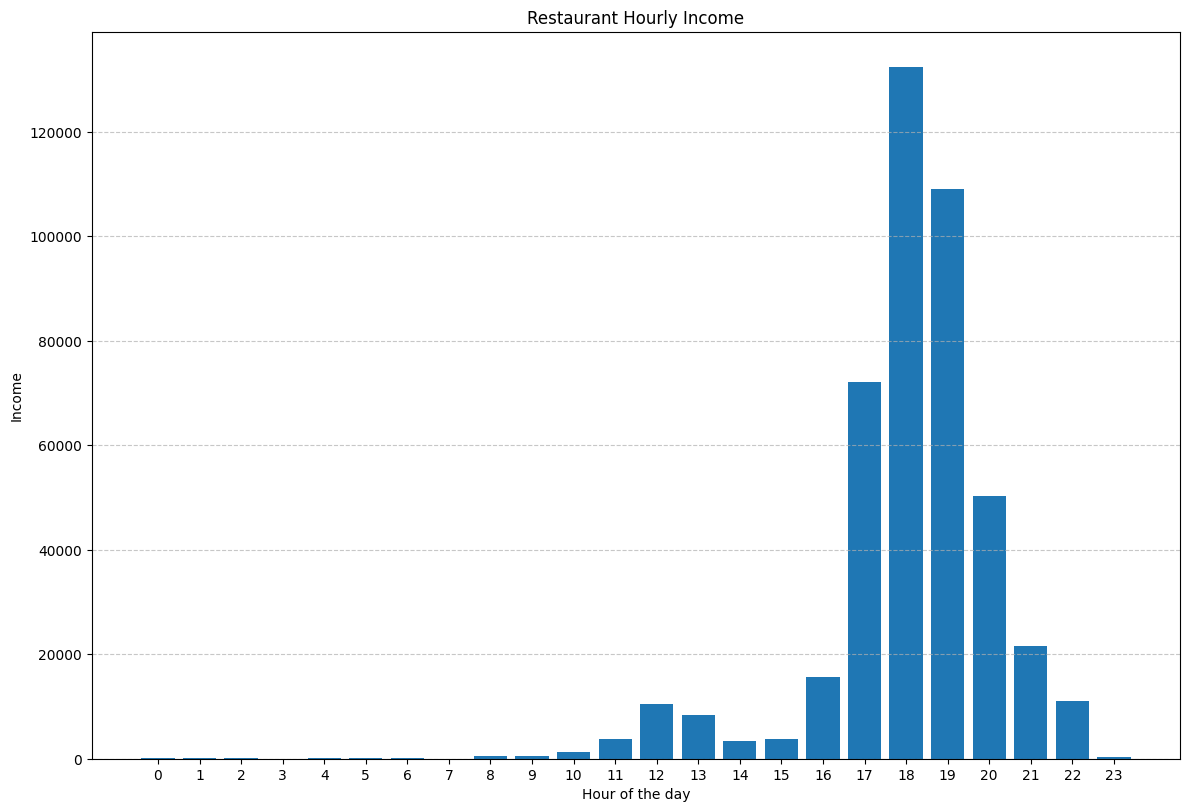

In [103]:
df["order-hour"] = pd.to_datetime(df["datetime"]).dt.hour

hourly_income = df.groupby("order-hour")["item-price"].sum().reset_index()

plt.figure(figsize=(12, 8))

plt.bar(hourly_income["order-hour"], hourly_income["item-price"])
plt.xlabel("Hour of the day")
plt.ylabel("Income")

plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Restaurant Hourly Income")

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

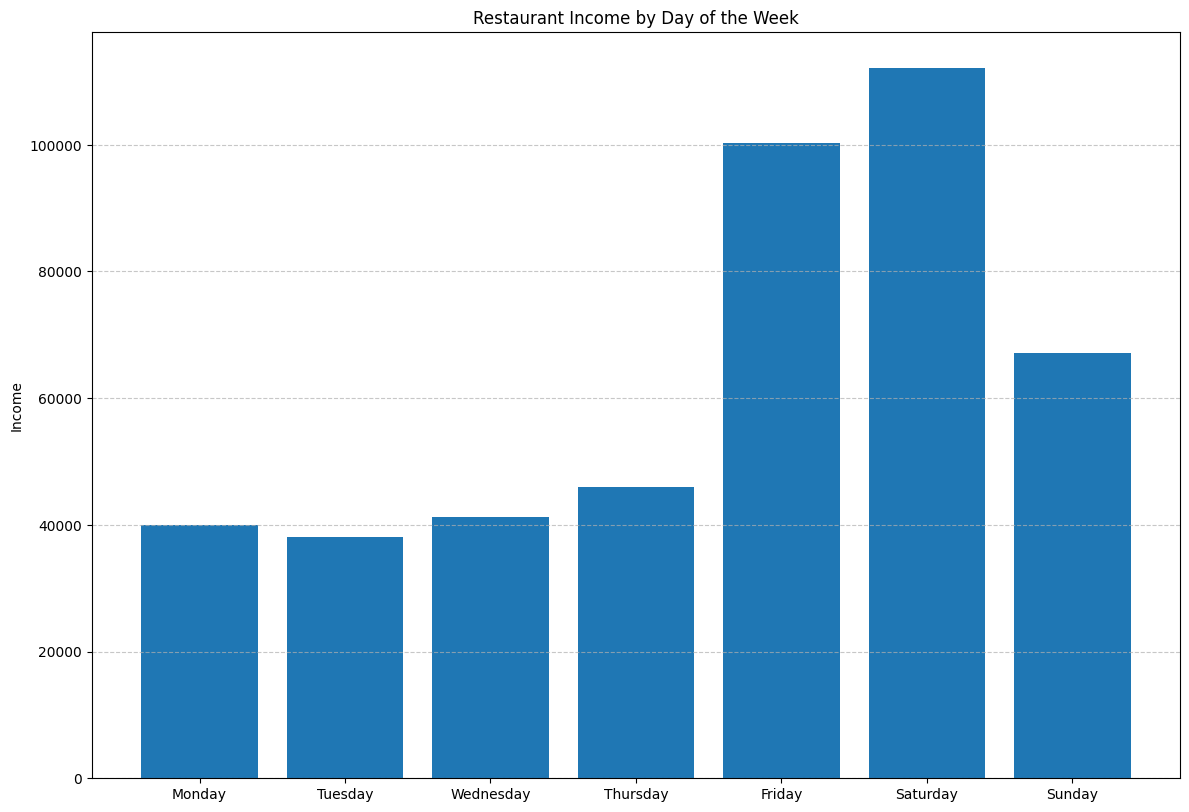

In [121]:
df["week-day"] =  pd.to_datetime(df["datetime"]).dt.weekday
df["week-day-name"] = pd.to_datetime(df["datetime"]).dt.day_name()

weekly_income = df.groupby(["week-day", "week-day-name"])["item-price"].sum().reset_index()
weekly_income.sort_values(by="week-day")

plt.figure(figsize=(12, 8))
plt.bar(weekly_income["week-day-name"], weekly_income["item-price"])

plt.ylabel("Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Restaurant Income by Day of the Week")

plt.show()